# WEEK 1 PROJECT: ANIMATED PLOT

## Importing packages

In [ ]:
pip install imageio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

## Reading files

In [2]:
continents = pd.read_csv('continents.csv', sep = ';', index_col=0)
life= pd.read_excel('gapminder_lifeexpectancy.xlsx',index_col=0)
population = pd.read_excel('gapminder_population.xlsx', index_col=0)
fert= pd.read_csv('gapminder_total_fertility.csv', sep = ',', index_col=0)

## Formatting Continents

In [22]:
continents

,country
Continents_name,
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
...,...
South America,Paraguay
South America,Peru
South America,Suriname


In [3]:
continents.index.names = ['Continents_name']

In [24]:
continents=continents.reset_index()

## Formatting Fertility

In [ ]:
fert.columns

In [4]:
fert.columns = fert.columns.astype(int)

In [5]:
fert.index.name = 'country'

In [6]:
fert=fert.reset_index()

In [7]:
fert=fert.melt(id_vars='country',
              var_name='year',
              value_name='fertility_rate')

## Formatting Life expectancy

In [8]:
life.index.name = 'country'

In [9]:
life=life.reset_index()

In [10]:
life=life.melt(id_vars='country',
              var_name='year',
              value_name='life_expectancy')

## Formatting Population 

In [ ]:
population

In [11]:
population = pd.DataFrame(population) 
population # yep! Now it's a DF

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
population.index.name = 'country'

In [13]:
population=population.reset_index()

In [14]:
population=population.melt(id_vars='country',
              var_name='year',
              value_name='population')

## Merging DFs 

In [15]:
df = fert.merge(population, left_on=['country','year'], right_on=['country','year'], how='outer')

In [16]:
df=df.merge(life, left_on=['country','year'], right_on=['country','year'], how='outer')

In [23]:
df = df.merge(continents, on=['country'], how='outer')

In [18]:
df

,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800.0,NaN,NaN,NaN
1,Abkhazia,1801.0,NaN,NaN,NaN
2,Abkhazia,1802.0,NaN,NaN,NaN
3,Abkhazia,1803.0,NaN,NaN,NaN
4,Abkhazia,1804.0,NaN,NaN,NaN
...,...,...,...,...,...
57945,Vatican City,NaN,NaN,NaN,NaN
57946,Saint Kitts and Nevis,NaN,NaN,NaN,NaN
57947,Saint Lucia,NaN,NaN,NaN,NaN
57948,Saint Vincent and the Grenadines,NaN,NaN,NaN,NaN


## Testing scatterplot

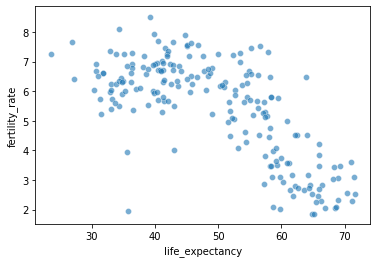

In [19]:
df_subset = df.loc[df['year'] == 1950]
sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6)

## Animated scatter plot

In [1]:
images=[]
for year in range (1960, 2015): 
    plt.axis((0, 100, 0, 10)) 
    sns.scatterplot(x='life_expectancy', y='fertility_rate',
                    data=df.loc[df['year'] == year], alpha=0.6,
                    size= 'population',
                    sizes = (5, 500),
                    legend=False, # the legend was not nice
                    hue= 'continent')
    plt.xlabel('Life expectancy (years)')
    plt.ylabel('Fertility rate')
    plt.title(f'{year}')
    filename=f'lifeexp_fert_{year}.png' # (['life' + str(year) + '.png'])
    plt.savefig(filename) 
    images.append(imageio.imread(filename))
    plt.close()
    plt.show()
    

imageio.mimsave('lifeexp_fert.gif', images, fps=20)


NameError: name 'plt' is not defined

![lifeexp_fert.gif](lifeexp_fert.gif)